# BigMart Sales Analysis Project

## Import some important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.colors as mcolors

In [2]:
from scipy.stats import mode
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score as CVS

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [3]:
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

## Make some functions

In [4]:
def Mode(x):
    return x.mode()[0]

def XY_Labels (x,y):
    X = plt.xlabel(x, fontsize = 15)
    Y = plt.ylabel(y, fontsize = 15)
    return (X,Y)

def label_encoder(b):
    le= preprocessing.LabelEncoder()
    return le.fit_transform(b) 

## Data Wrangling

### Load and discover our data

In [5]:
tr_df = pd.read_csv('Train.csv')
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
te_df = pd.read_csv('Test.csv')
te_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
tr_df.duplicated().sum()

0

In [10]:
te_df.duplicated().sum()

0

In [11]:
print(tr_df['Outlet_Size'].value_counts())
print(te_df['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [12]:
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
te_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Handling Missing & Null Values using Mean & Mode functions

In [14]:
tr_df['Item_Weight'].fillna(tr_df['Item_Weight'].mean(), inplace= True)
te_df['Item_Weight'].fillna(te_df['Item_Weight'].mean(), inplace= True)

In [15]:
tr_df['Item_Weight'].isnull().sum(),te_df['Item_Weight'].isnull().sum()

(0, 0)

In [16]:
tr_df['Outlet_Size'] = tr_df['Outlet_Size'].fillna(tr_df['Outlet_Size'].mode()[0])
te_df['Outlet_Size'] = te_df['Outlet_Size'].fillna(te_df['Outlet_Size'].mode()[0])

### Removing Outliers from data 

<AxesSubplot:xlabel='Item_Outlet_Sales'>

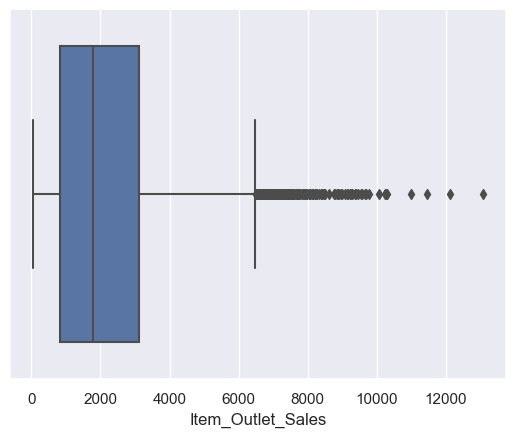

In [17]:
sns.boxplot(tr_df['Item_Outlet_Sales'])

In [18]:
q1, q3 = np.percentile(tr_df['Item_Outlet_Sales'], [25, 75])
iqr = q3 - q1
print("The Inter Quartile Range is: "+ str(iqr))
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = tr_df[(tr_df['Item_Outlet_Sales'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['Item_Outlet_Sales'])))
print(np.sort(outliers['Item_Outlet_Sales'].unique()))
tr_df = tr_df[(tr_df['Item_Outlet_Sales'] >= lower_bound)
                        & (tr_df['Item_Outlet_Sales'] <= upper_bound)]

The Inter Quartile Range is: 2267.049
The total number of outliers is: 186
[ 6503.5344  6507.5292  6515.5188  6524.84    6528.169   6543.4824
  6574.775   6579.4356  6595.4148  6608.065   6611.394   6615.3888
  6622.7126  6624.71    6630.0364  6636.6944  6641.355   6668.6528
  6669.3186  6687.961   6692.6216  6704.606   6705.2718  6723.2484
  6729.9064  6751.212   6757.87    6759.2016  6767.1912  6768.5228
  6769.8544  6771.186   6775.1808  6795.1548  6796.4864  6817.792
  6831.108   6849.0846  6851.082   6852.4136  6855.0768  6867.0612
  6872.3876  6881.043   6893.0274  6897.688   6911.004   6930.978
  6942.9624  6964.9338  6970.926   6972.2576  6976.2524  7017.532
  7028.1848  7028.8506  7033.5112  7064.8038  7073.4592  7084.112
  7086.1094  7094.7648  7100.757   7105.4176  7116.0704  7130.718
  7136.7102  7142.7024  7148.0288  7150.692   7152.0236  7158.6816
  7168.6686  7170.666   7182.6504  7190.64    7192.6374  7201.2928
  7222.5984  7240.575   7247.233   7266.5412  7296.5022  72

<AxesSubplot:xlabel='Item_Outlet_Sales'>

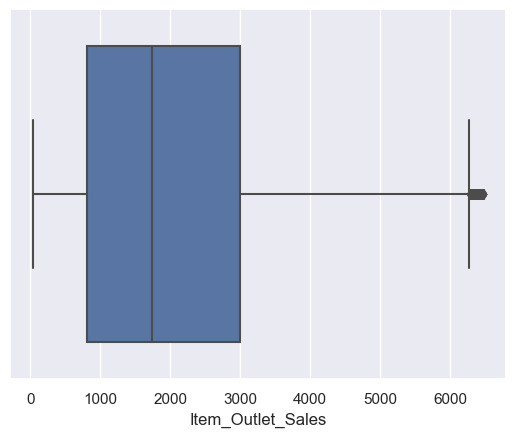

In [19]:
sns.boxplot(tr_df['Item_Outlet_Sales'])

AxesSubplot(0.125,0.11;0.775x0.77)


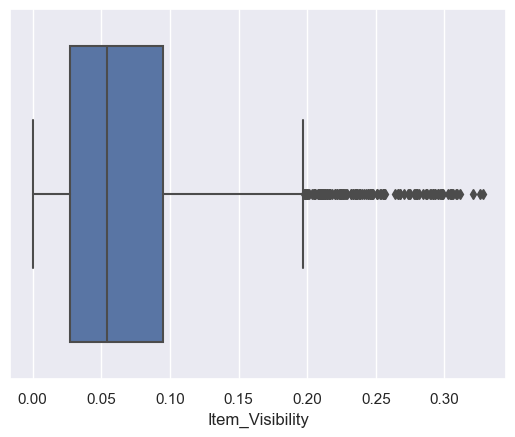

In [20]:
print(sns.boxplot(tr_df['Item_Visibility']))

In [21]:
Q1, Q3 = np.percentile(tr_df['Item_Visibility'], [25, 75])
IQR = Q3 - Q1
print("The Inter Quartile Range is: "+ str(IQR))
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)
Outliers = tr_df[(tr_df['Item_Visibility'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['Item_Visibility'])))
print(np.sort(Outliers['Item_Visibility'].unique()))
tr_df = tr_df[(tr_df['Item_Visibility'] >= Lower_bound)
                        & (tr_df['Item_Visibility'] <= Upper_bound)]

The Inter Quartile Range is: 0.068270526
-0.075377466
0.197704638
The total number of Outliers is: 141
[0.19780911 0.19831665 0.19842484 0.19875618 0.19899855 0.19993588
 0.19995527 0.2004264  0.20168772 0.20351067 0.2047     0.20471304
 0.20498454 0.20529483 0.20548439 0.20560512 0.20778348 0.20816216
 0.20839772 0.20866255 0.20898712 0.20914265 0.20916294 0.20960008
 0.21002171 0.21037581 0.21051156 0.21059648 0.21130667 0.21153939
 0.21229375 0.21296319 0.21312548 0.21332355 0.21412513 0.21413979
 0.21430613 0.21442379 0.21468106 0.21561193 0.21610753 0.21632301
 0.21647815 0.21799414 0.22011112 0.22022561 0.22185649 0.22206335
 0.22344026 0.22398529 0.22417463 0.2246074  0.22483731 0.22547653
 0.22612296 0.22628438 0.22718958 0.22726069 0.22846952 0.22899313
 0.23207267 0.23212188 0.23303982 0.23335657 0.23473348 0.23518321
 0.23535406 0.23585941 0.2364336  0.23653561 0.23661675 0.23765134
 0.23836644 0.23883187 0.24026825 0.24105561 0.24276866 0.24410231
 0.24433899 0.24540739 0.2

AxesSubplot(0.125,0.11;0.775x0.77)


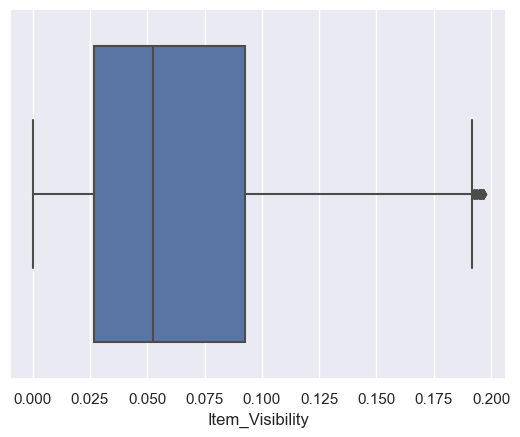

In [22]:
print(sns.boxplot(tr_df['Item_Visibility']))

AxesSubplot(0.125,0.11;0.775x0.77)


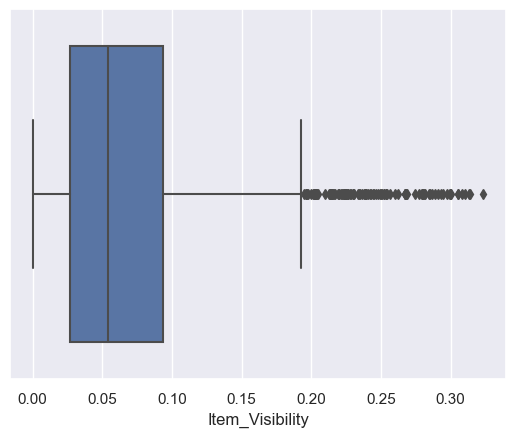

In [23]:
print(sns.boxplot(te_df['Item_Visibility']))

In [24]:
Q11, Q13 = np.percentile(te_df['Item_Visibility'], [25, 75])
IQR1 = Q13 - Q11
print("The Inter Quartile Range is: "+ str(IQR1))
Lower_bound1 = Q11 - 1.5 * IQR1
Upper_bound1 = Q13 + 1.5 * IQR1
print(Lower_bound1)
print(Upper_bound1)
Outliers1 = te_df[(te_df['Item_Visibility'] > Upper_bound1)]
print("The total number of Outliers is: " + str (len(Outliers1['Item_Visibility'])))
print(np.sort(Outliers1['Item_Visibility'].unique()))
te_df = te_df[(te_df['Item_Visibility'] >= Lower_bound1)
                        & (te_df['Item_Visibility'] <= Upper_bound1)]

The Inter Quartile Range is: 0.066415748
-0.072576747
0.193086245
The total number of Outliers is: 113
[0.19457694 0.19596346 0.19626775 0.19657205 0.19689764 0.19767982
 0.19982599 0.20164356 0.20176529 0.20192757 0.20238739 0.20294827
 0.20340077 0.20353693 0.20358824 0.20428075 0.20473381 0.20968412
 0.21276709 0.21347869 0.21378898 0.21400454 0.21430613 0.21439663
 0.21471985 0.21495257 0.21507294 0.21572829 0.21660116 0.21676258
 0.21956811 0.21991455 0.22022101 0.22103705 0.2221325  0.22285847
 0.22330909 0.22363367 0.2242693  0.22447216 0.22483009 0.22485083
 0.22566227 0.22608418 0.2267442  0.22760974 0.22835316 0.22967892
 0.23024693 0.23038943 0.23372937 0.23434562 0.23534113 0.23659521
 0.23772573 0.23857976 0.23886851 0.23899023 0.23953003 0.23956881
 0.24051168 0.24208344 0.24276866 0.24416317 0.2451369  0.24617826
 0.24784318 0.24934288 0.25000874 0.25111454 0.25201915 0.25215589
 0.25342191 0.25394782 0.25463075 0.25691913 0.26004041 0.26250432
 0.26710672 0.26733966 0.2

AxesSubplot(0.125,0.11;0.775x0.77)


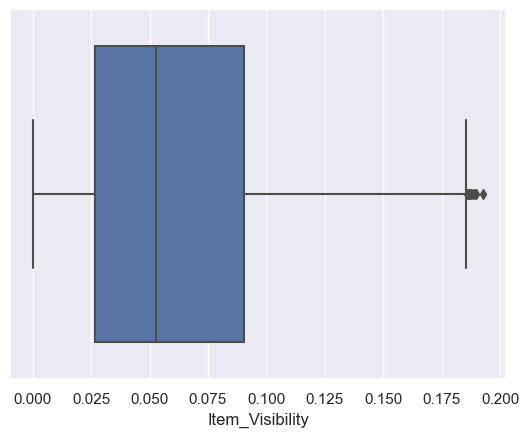

In [25]:
print(sns.boxplot(te_df['Item_Visibility']))

In [26]:
tr_df['Outlet_Age']= tr_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
tr_df['Outlet_Age'].head()
te_df['Outlet_Age']= te_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
te_df['Outlet_Age'].head()

0    21
1    13
2    22
3    13
4    35
Name: Outlet_Age, dtype: int64

In [27]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8196 non-null   object 
 1   Item_Weight                8196 non-null   float64
 2   Item_Fat_Content           8196 non-null   object 
 3   Item_Visibility            8196 non-null   float64
 4   Item_Type                  8196 non-null   object 
 5   Item_MRP                   8196 non-null   float64
 6   Outlet_Identifier          8196 non-null   object 
 7   Outlet_Establishment_Year  8196 non-null   int64  
 8   Outlet_Size                8196 non-null   object 
 9   Outlet_Location_Type       8196 non-null   object 
 10  Outlet_Type                8196 non-null   object 
 11  Item_Outlet_Sales          8196 non-null   float64
 12  Outlet_Age                 8196 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [28]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5568 non-null   object 
 1   Item_Weight                5568 non-null   float64
 2   Item_Fat_Content           5568 non-null   object 
 3   Item_Visibility            5568 non-null   float64
 4   Item_Type                  5568 non-null   object 
 5   Item_MRP                   5568 non-null   float64
 6   Outlet_Identifier          5568 non-null   object 
 7   Outlet_Establishment_Year  5568 non-null   int64  
 8   Outlet_Size                5568 non-null   object 
 9   Outlet_Location_Type       5568 non-null   object 
 10  Outlet_Type                5568 non-null   object 
 11  Outlet_Age                 5568 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 565.5+ KB


In [29]:
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000
mean,12.864825,0.063270,139.106916,1998.086506,2088.912082,21.913494
std,4.266971,0.046347,61.528746,8.287951,1501.583374,8.287951
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,9.300000,0.026818,93.027800,1987.000000,856.884600,16.000000
50%,12.857645,0.052745,141.131200,1999.000000,1780.349200,21.000000
75%,16.100000,0.092839,183.663400,2004.000000,3020.068800,33.000000
max,21.350000,0.196660,266.888400,2009.000000,6478.234000,35.000000


In [30]:
te_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age
count,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000
mean,12.697030,0.062075,141.165964,1997.956178,22.043822
std,4.263605,0.044739,61.771156,8.357356,8.357356
min,4.555000,0.000000,31.990000,1985.000000,11.000000
25%,9.195000,0.026717,94.533750,1987.000000,16.000000
50%,12.695633,0.052691,141.548300,1999.000000,21.000000
75%,15.850000,0.090248,186.098350,2004.000000,33.000000
max,21.350000,0.192767,266.588400,2009.000000,35.000000


In [31]:
Num = tr_df.select_dtypes('number').columns.to_list()
Obj = tr_df.select_dtypes('object').columns.to_list()

Num_df =  tr_df[Num]
Obj_df = tr_df[Obj]

[tr_df[category].value_counts() for category in Obj[1:]]

[Low Fat    4900
 Regular    2770
 LF          304
 reg         115
 low fat     107
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1175
 Snack Foods              1154
 Household                 878
 Frozen Foods              830
 Dairy                     649
 Canned                    627
 Baking Goods              623
 Health and Hygiene        507
 Soft Drinks               428
 Meat                      409
 Breads                    242
 Hard Drinks               207
 Others                    167
 Starchy Foods             139
 Breakfast                 101
 Seafood                    60
 Name: Item_Type, dtype: int64,
 OUT018    925
 OUT045    920
 OUT046    920
 OUT049    919
 OUT013    917
 OUT035    914
 OUT017    907
 OUT027    832
 OUT010    489
 OUT019    453
 Name: Outlet_Identifier, dtype: int64,
 Medium    4992
 Small     2287
 High       917
 Name: Outlet_Size, dtype: int64,
 Tier 3    3163
 Tier 2    2741
 Tier 1    2292
 Name: Outlet_Location_Type,

In [32]:
print(Obj, Num)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']


In [33]:
Num_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
0,9.300,0.016047,249.8092,1999,3735.1380,21
1,5.920,0.019278,48.2692,2009,443.4228,11
2,17.500,0.016760,141.6180,1999,2097.2700,21
3,19.200,0.000000,182.0950,1998,732.3800,22
4,8.930,0.000000,53.8614,1987,994.7052,33
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,33
8519,8.380,0.046982,108.1570,2002,549.2850,18
8520,10.600,0.035186,85.1224,2004,1193.1136,16
8521,7.210,0.145221,103.1332,2009,1845.5976,11


In [34]:
print(tr_df['Item_Fat_Content'].value_counts())
print(te_df['Item_Fat_Content'].value_counts())

Low Fat    4900
Regular    2770
LF          304
reg         115
low fat     107
Name: Item_Fat_Content, dtype: int64
Low Fat    3339
Regular    1890
LF          200
reg          74
low fat      65
Name: Item_Fat_Content, dtype: int64


In [35]:
tr_df['Item_Fat_Content'] = tr_df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
te_df['Item_Fat_Content'] = te_df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

tr_df['Item_Fat_Content'] = tr_df['Item_Fat_Content'].replace(['reg'], 'Regular')
te_df['Item_Fat_Content'] = te_df['Item_Fat_Content'].replace(['reg'], 'Regular')

print(tr_df['Item_Fat_Content'].value_counts())
print(te_df['Item_Fat_Content'].value_counts())

Low Fat    5311
Regular    2885
Name: Item_Fat_Content, dtype: int64
Low Fat    3604
Regular    1964
Name: Item_Fat_Content, dtype: int64


In [36]:
tr_df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,11
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33


In [37]:
te_df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,21
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,13
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,22
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,13
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,35
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,23
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,11


## Exploratory Data Analysis (EDA)

## Univariate & Multivariate Plots

### What is the Percentage of Fat Content in the Products ??

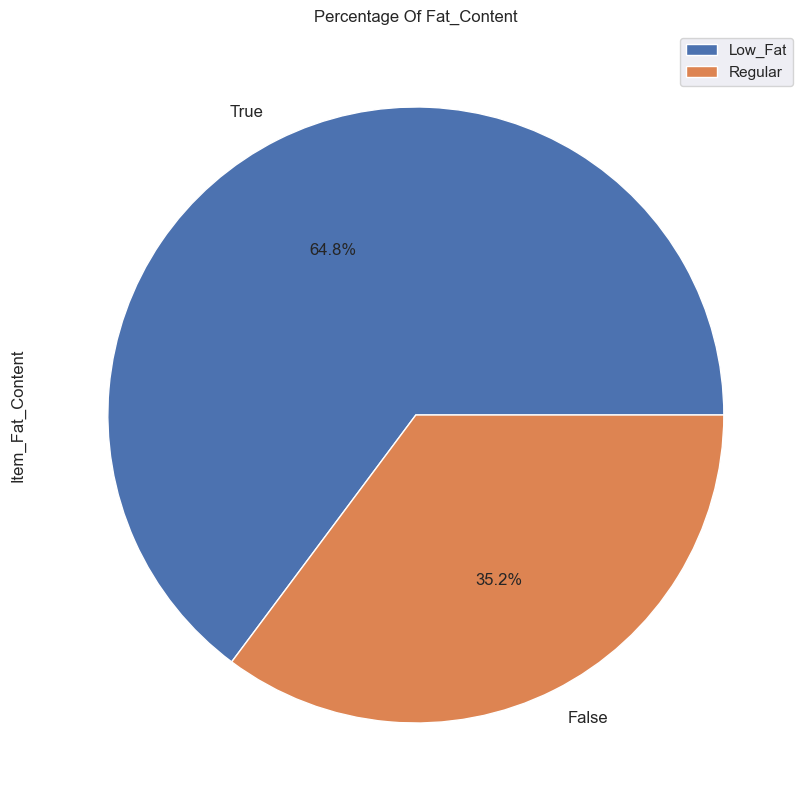

In [38]:
LF = tr_df['Item_Fat_Content'] == "Low Fat"
R = tr_df['Item_Fat_Content'] == "Regular"
Fat_Content = LF.value_counts()
Fat_Content.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12)  
plt.title("Percentage Of Fat_Content")
plt.legend(["Low_Fat", "Regular"])

In [39]:
LF = tr_df['Item_Fat_Content'] == "Low Fat"
R = tr_df['Item_Fat_Content'] == "Regular"
LF.value_counts()

True     5311
False    2885
Name: Item_Fat_Content, dtype: int64

### From previous fig, it seems that Low Fat items are most preferable items

## Histogram for Outlet Age & Item MRP

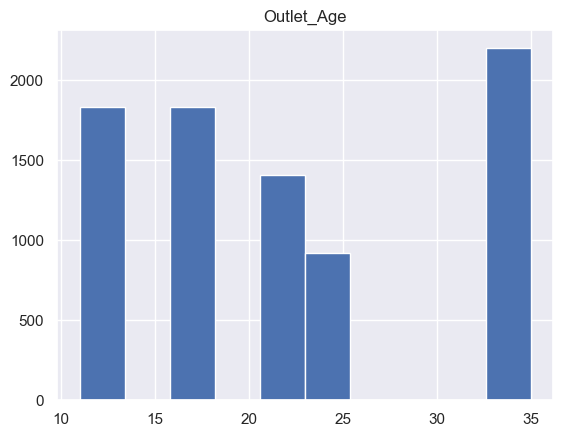

In [40]:
plt.hist(tr_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

Text(0.5, 1.0, 'Item_MRP')

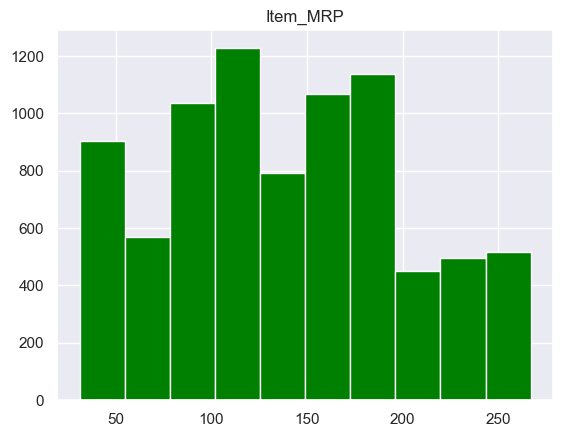

In [41]:
plt.figure()
plt.hist(tr_df['Item_MRP'], color='green')
plt.title('Item_MRP')

### From previous figs, we can say that The most common outlets are 35 years old. 
### And most common products have Item's MRP value in between 100 & 200 

### Now, let's analyze some Categorical Columns

### What are the most preferable Item Types ??

Text(0.5, 1.0, 'Top Paid Item Types')

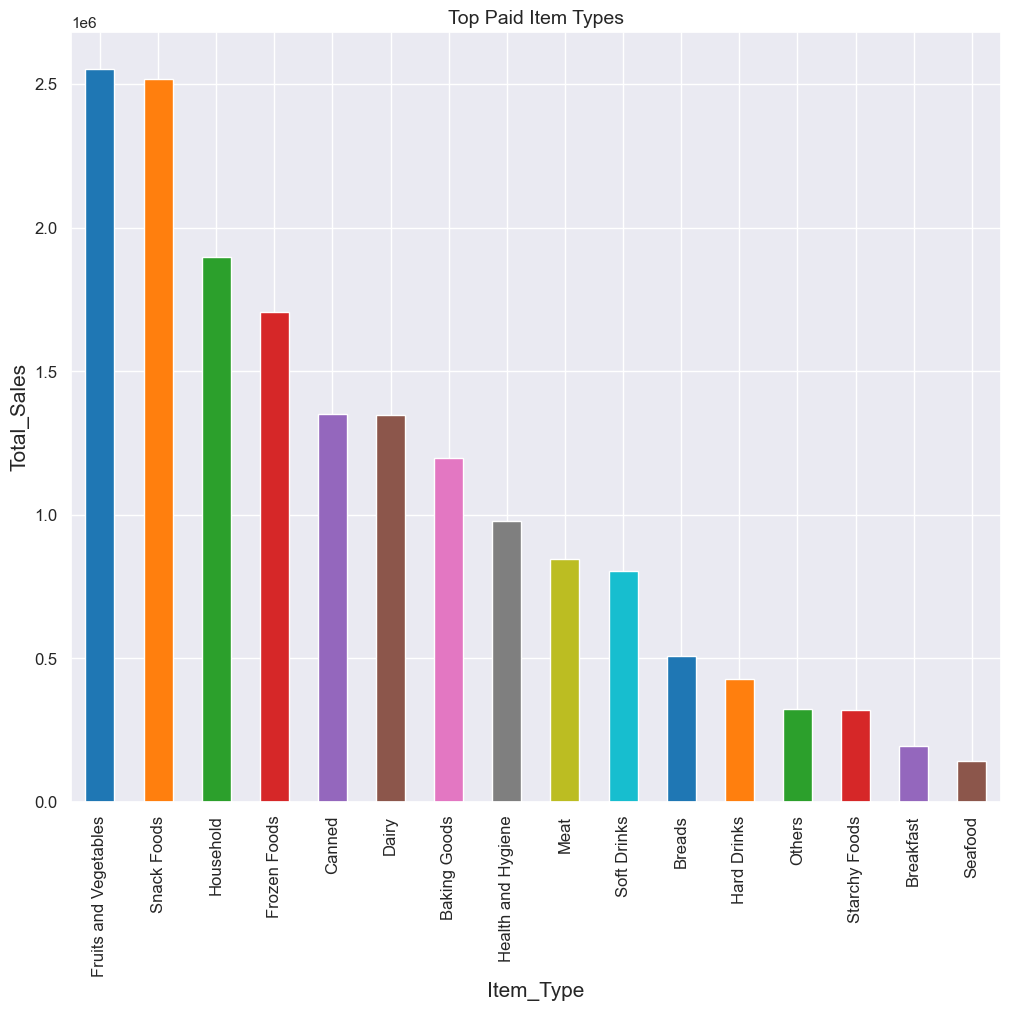

In [42]:
tr_df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending= False).plot(kind='bar', figsize = (12,10), fontsize = 12, color = mcolors.TABLEAU_COLORS)
XY_Labels ("Item_Type","Total_Sales")
plt.title("Top Paid Item Types", fontsize = 14)

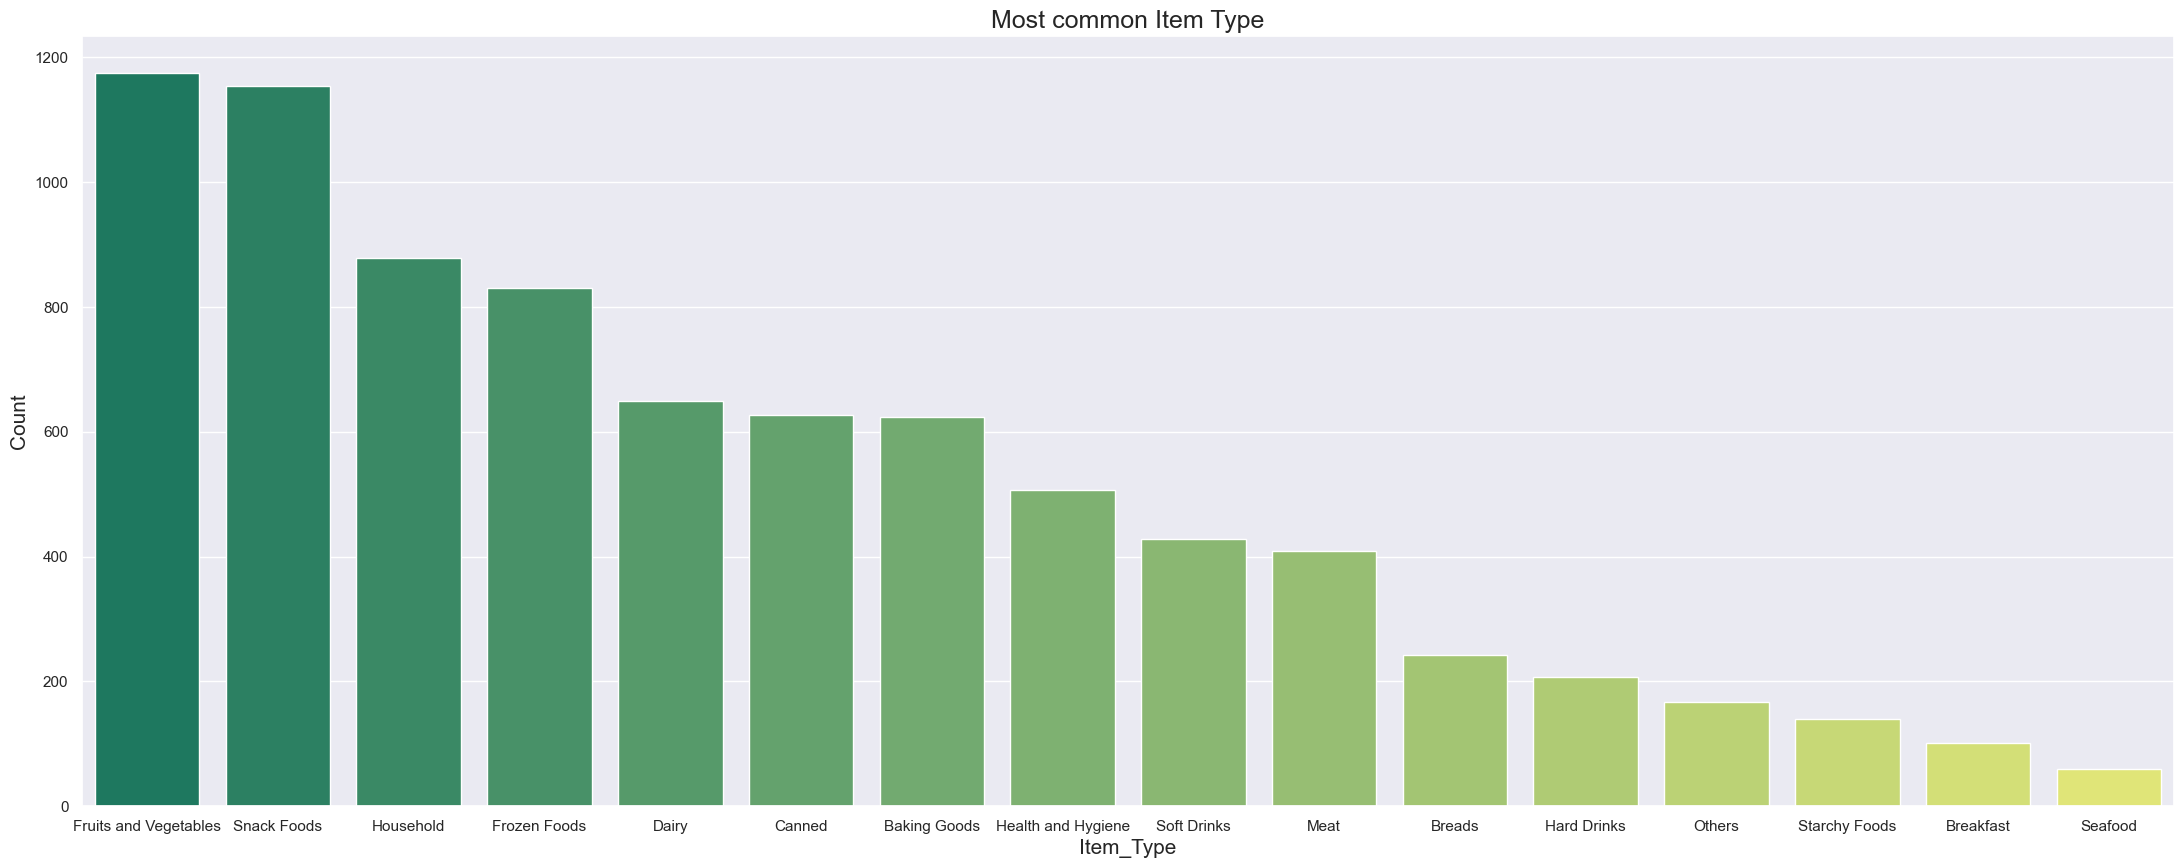

In [43]:
plt.figure(figsize=(27,10))
sns.countplot(x= 'Item_Type', data= tr_df, palette= 'summer', order= tr_df['Item_Type'].value_counts(ascending= False).index)
XY_Labels ("Item_Type","Count")
plt.title("Most common Item Type", fontsize = 18)
plt.show()

### It seems that most common and also most paid Item Types are Fruits & Vegetables and Snack Foods.

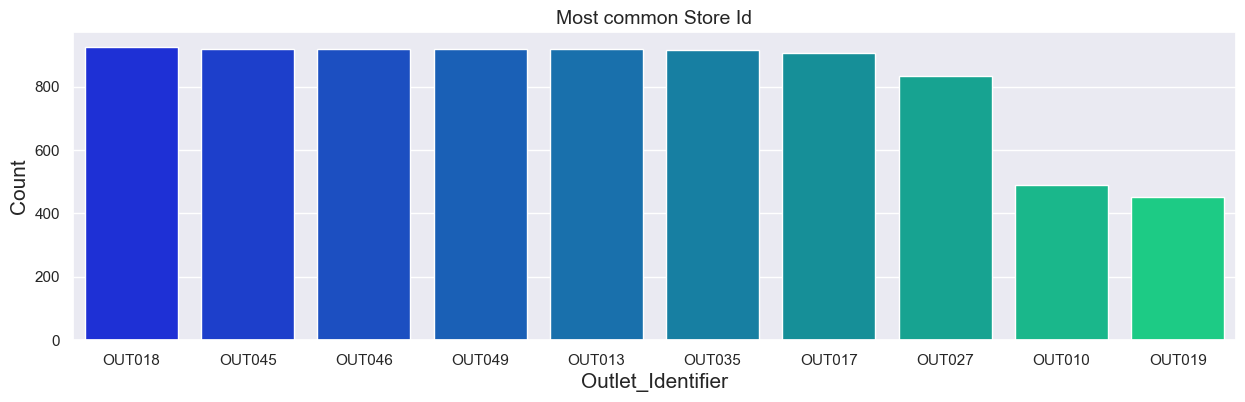

In [44]:
plt.figure(figsize=(15,4))
sns.countplot(x= 'Outlet_Identifier',data= tr_df,palette='winter',order= tr_df['Outlet_Identifier'].value_counts(ascending= False).index)
XY_Labels ("Outlet_Identifier", "Count")
plt.title("Most common Store Id", fontsize = 14)
plt.show()

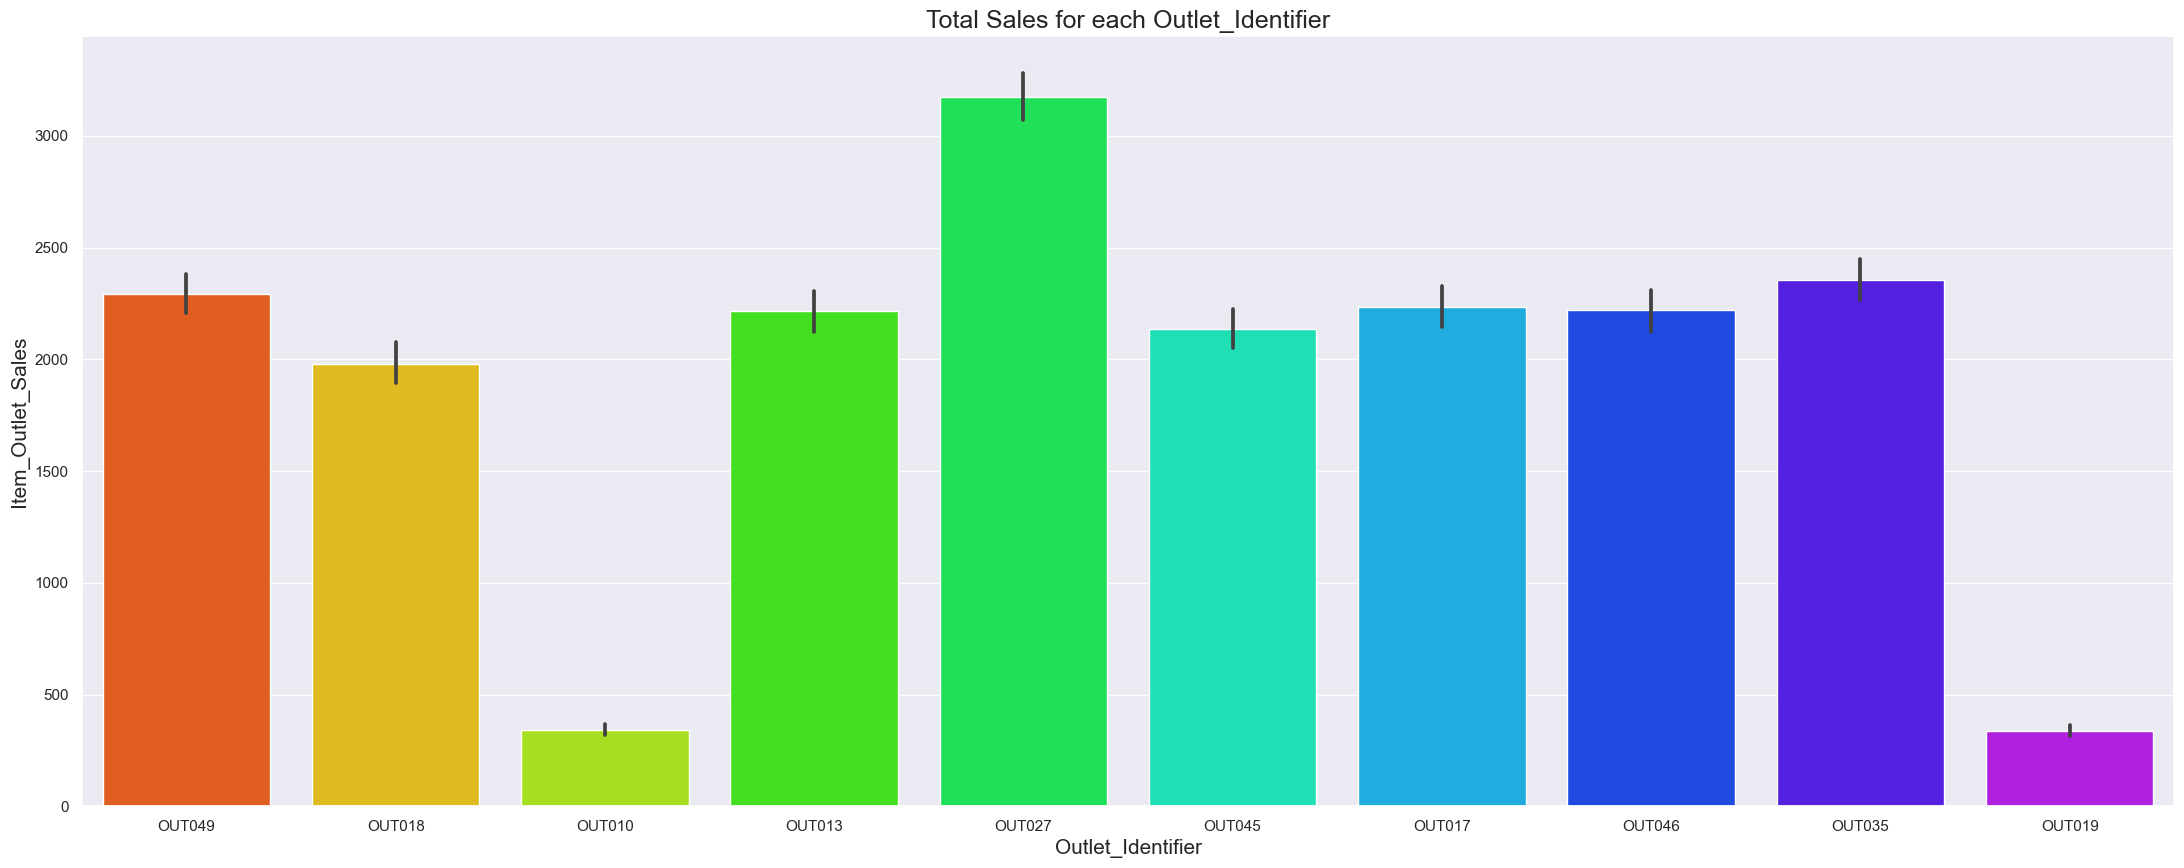

In [45]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier', 'Item_Outlet_Sales', data= tr_df, palette='gist_rainbow')
XY_Labels ("Outlet_Identifier", "Item_Outlet_Sales")
plt.title("Total Sales for each Outlet_Identifier", fontsize = 18)
plt.show()

### For different Stores it seems that Out27 has the most sales and both of Out10 & Out19 has the least sales and also the least common stores between the others. 

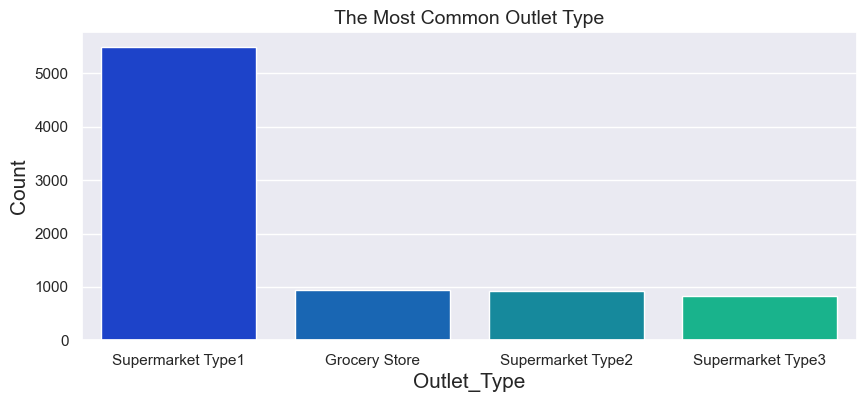

In [46]:
plt.figure(figsize=(10,4))
sns.countplot(x= 'Outlet_Type', data= tr_df, palette='winter', order= tr_df['Outlet_Type'].value_counts(ascending= False).index)
XY_Labels ("Outlet_Type", "Count")
plt.title("The Most Common Outlet Type", fontsize = 14)
plt.show()

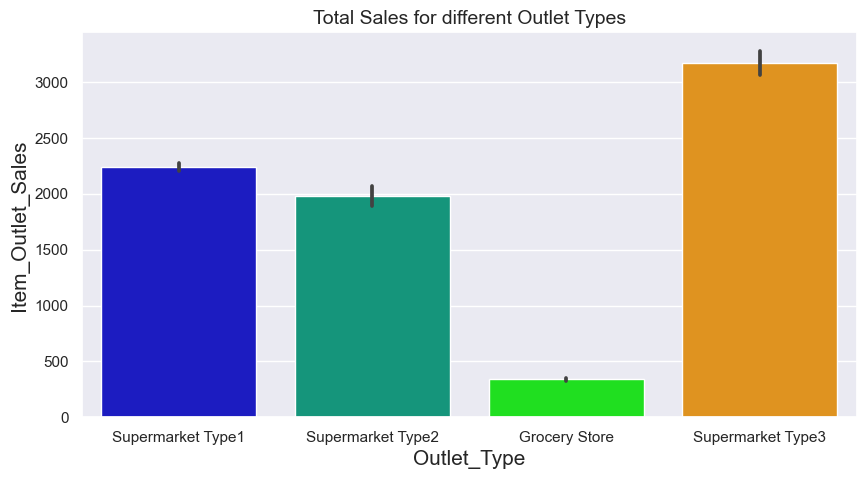

In [47]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=tr_df ,palette='nipy_spectral')
XY_Labels ("Outlet_Type", "Item_Outlet_Sales")
plt.title("Total Sales for different Outlet Types", fontsize = 14)
plt.show()

### For different Outlet Types, Supermarket Type1 is the most common type. But on the other hand, Supermarket Type3 has the most sales.

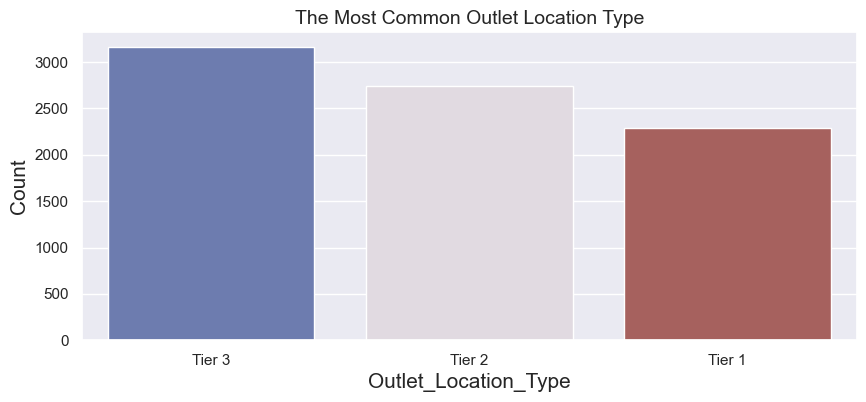

In [48]:
plt.figure(figsize=(10,4))
sns.countplot(x= 'Outlet_Location_Type', data= tr_df, order= tr_df['Outlet_Location_Type'].value_counts(ascending= False).index, palette='twilight_shifted')
XY_Labels ("Outlet_Location_Type", "Count")
plt.title("The Most Common Outlet Location Type", fontsize = 14)
plt.show()

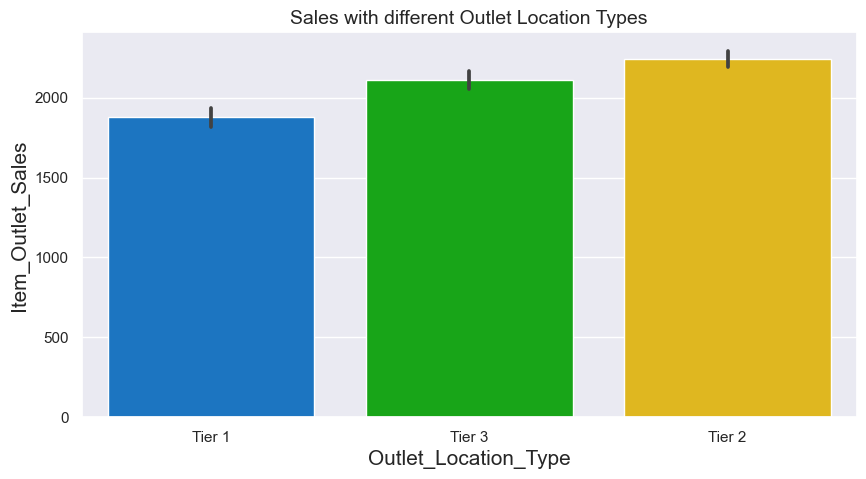

In [49]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=tr_df ,palette='nipy_spectral')
XY_Labels ("Outlet_Location_Type", "Item_Outlet_Sales")
plt.title("Sales with different Outlet Location Types", fontsize = 14)
plt.show()

### From previous 2 figures, it seems that Location Type of Tier3 is the most common Location Type. Although, Location Type of tier2 has the most sales.

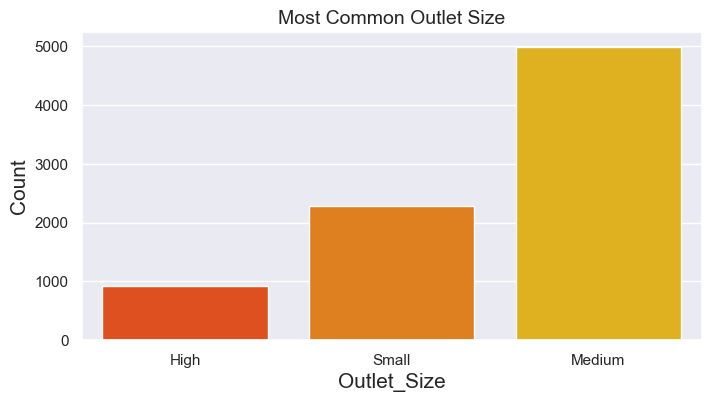

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(x= 'Outlet_Size', data= tr_df, palette= 'autumn', order= tr_df['Outlet_Size'].value_counts(ascending= True).index)
XY_Labels ("Outlet_Size", "Count")
plt.title("Most Common Outlet Size", fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Top Paid Outlet_Size')

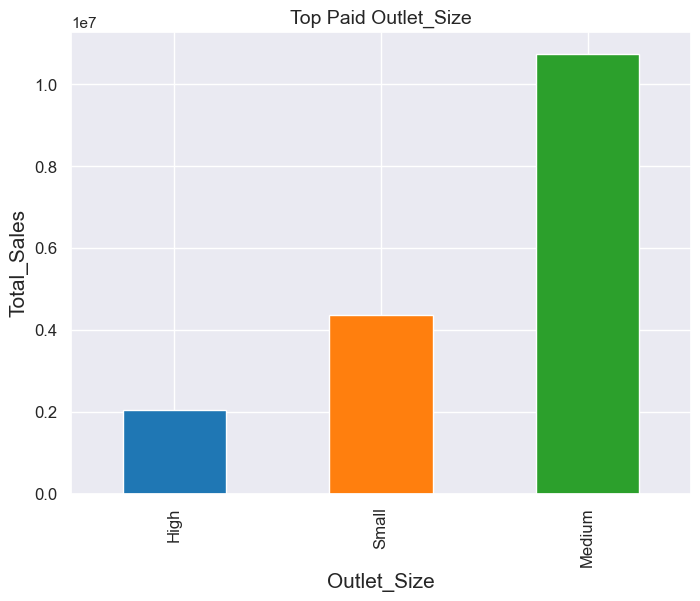

In [51]:
tr_df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending= True).plot(kind='bar', figsize = (8,6), fontsize = 12, color = mcolors.TABLEAU_COLORS)
XY_Labels ("Outlet_Size","Total_Sales")
plt.title("Top Paid Outlet_Size", fontsize = 14)

### Finally, for different stores' sizes, it seems that Medium size considered as the most common and has the highest sales between different sizes. 

## Let's Analyze Numerical Columns

### Relation between Some Numerical Columns and Item_Outlet_Sales

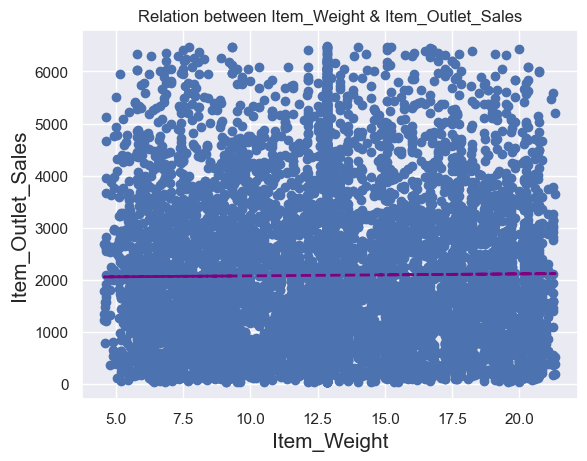

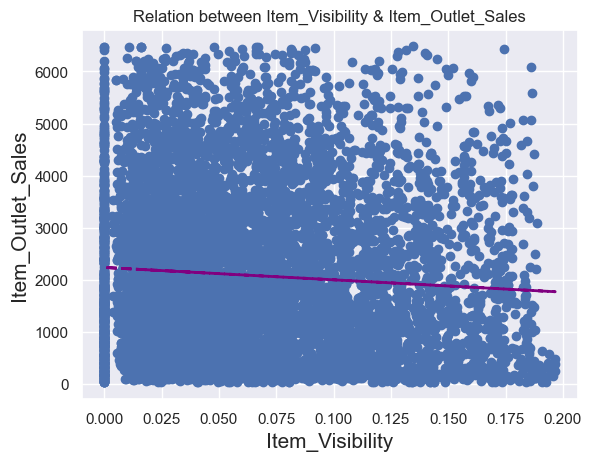

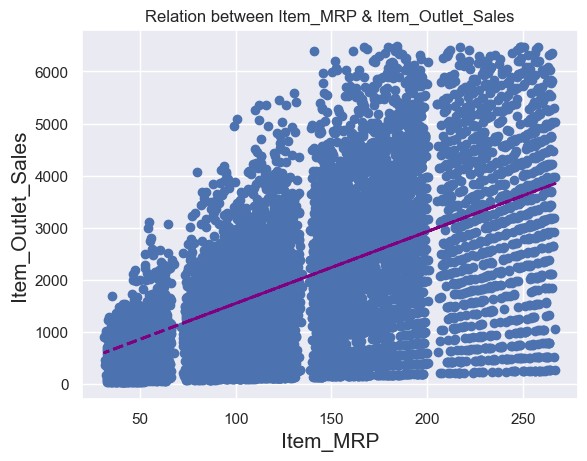

In [52]:
for Numeric in Num_df[Num[:3]]:
    x= Num_df[Numeric]
    y= Num_df['Item_Outlet_Sales']
    plt.scatter(x, y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), color= "purple", linewidth= 2, linestyle= "--")
    plt.title("Relation between " + Numeric + " & Item_Outlet_Sales")
    XY_Labels (Numeric, "Item_Outlet_Sales")
    plt.show()

### For different scatter plots, it seems we have a positive relationship between Item's MRP and Item Outlet Sales. But for Item Visibility and Item Weight, they seem very spreaded and there is no relation with Item Outlet Sales. 

## Correlation

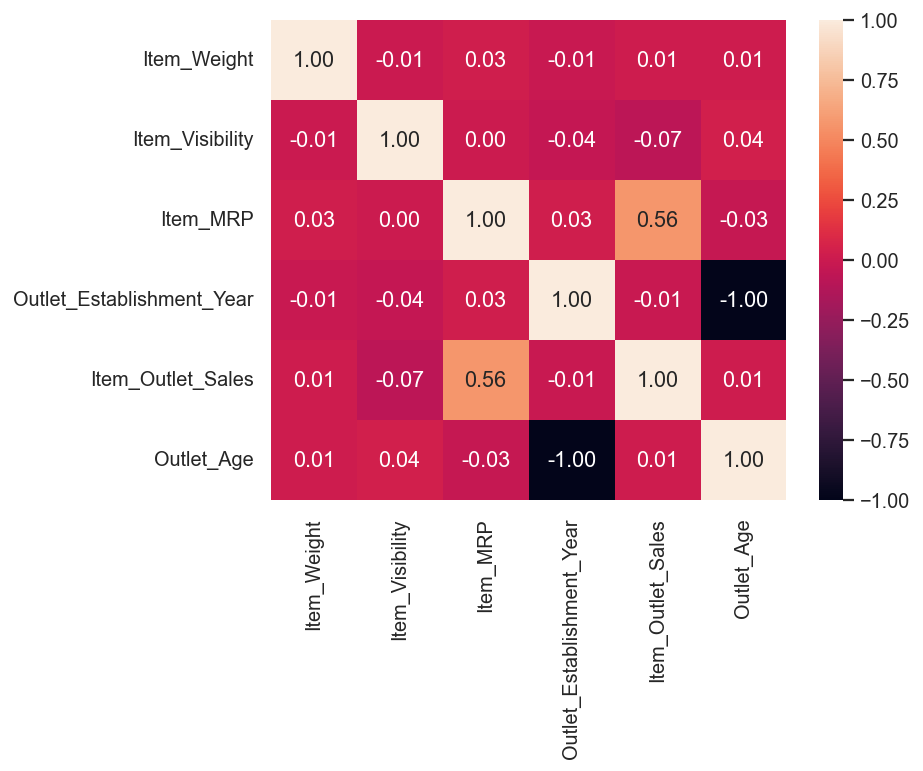

In [53]:
corr = tr_df.corr()
plt.figure(dpi=130)
sns.heatmap(tr_df.corr(), annot=True, fmt= '.2f')
plt.show()

In [54]:
corr['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.564140
Item_Weight                  0.010640
Outlet_Age                   0.009214
Outlet_Establishment_Year   -0.009214
Item_Visibility             -0.072984
Name: Item_Outlet_Sales, dtype: float64

### From our map it seems that there is a high correlation between Item's MRP and Item Outlet Sales.

### Now it seems there is no need for Item & Outlet Identifier columns and also Establishment Year column.

In [55]:
tr_df = tr_df.drop(columns =['Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Identifier'])
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8196 non-null   float64
 1   Item_Fat_Content      8196 non-null   object 
 2   Item_Visibility       8196 non-null   float64
 3   Item_Type             8196 non-null   object 
 4   Item_MRP              8196 non-null   float64
 5   Outlet_Size           8196 non-null   object 
 6   Outlet_Location_Type  8196 non-null   object 
 7   Outlet_Type           8196 non-null   object 
 8   Item_Outlet_Sales     8196 non-null   float64
 9   Outlet_Age            8196 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 704.3+ KB


In [56]:
te_df = te_df.drop(columns =['Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Identifier'])
te_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5568 non-null   float64
 1   Item_Fat_Content      5568 non-null   object 
 2   Item_Visibility       5568 non-null   float64
 3   Item_Type             5568 non-null   object 
 4   Item_MRP              5568 non-null   float64
 5   Outlet_Size           5568 non-null   object 
 6   Outlet_Location_Type  5568 non-null   object 
 7   Outlet_Type           5568 non-null   object 
 8   Outlet_Age            5568 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 435.0+ KB


## Feature Engineering

### Using Label Encoder function

In [57]:
tr_df['Outlet_Size']= label_encoder(tr_df['Outlet_Size'])
te_df['Outlet_Size']= label_encoder(te_df['Outlet_Size'])
tr_df['Outlet_Location_Type']= label_encoder(tr_df['Outlet_Location_Type'])
te_df['Outlet_Location_Type']= label_encoder(te_df['Outlet_Location_Type'])
tr_df['Item_Fat_Content']= label_encoder(tr_df['Item_Fat_Content'])
te_df['Item_Fat_Content']= label_encoder(te_df['Item_Fat_Content'])

In [58]:
cols = ['Item_Type','Outlet_Type']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

tr_oh = pd.DataFrame(OH_encoder.fit_transform(tr_df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(te_df[cols])).astype('int64')
print(tr_oh.head())

tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)
print(tr_oh.columns)

tr_oh.index = tr_df.index
te_oh.index = te_df.index
print(tr_oh.index)

tr_fe = pd.concat([tr_df, tr_oh], axis=1)
te_fe = pd.concat([te_df, te_oh], axis=1)
print(tr_fe.info())

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   
2   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0   
3   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   
4   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   

   19  
0   0  
1   0  
2   0  
3   0  
4   0  
Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'O

In [59]:
tr_fe = tr_fe.drop(['Outlet_Type', 'Item_Type'], axis= 1)
te_fe = te_fe.drop(['Outlet_Type', 'Item_Type'], axis= 1)
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [61]:
def cross_val(model_name, model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [62]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_MAE = round(MAE(y_test, y_predict),2)
model_MSE = round(MSE(y_test, y_predict),2)
model_R_2 = round(R2(y_test, y_predict),4)
model_CS  = round(CVS(model, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {model_MAE}\n")
print(f" Mean Squared Error: {model_MSE}\n")
print(f" R^2 Score: {model_R_2}\n")
cross_val(model, LinearRegression(), X, y, 5)

 Mean Absolute Error: 772.75

 Mean Squared Error: 1027733.81

 R^2 Score: 0.5434

LinearRegression(normalize=True) Scores:
0.55
0.55
0.53
0.55
0.56
Average LinearRegression(normalize=True) score: 0.5454


In [63]:
Linear_Regression= pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

In [64]:
Model= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
Model.fit(X_train, y_train)
y_predict = Model.predict(X_test)

Model_MAE = round(MAE(y_test, y_predict),2)
Model_MSE = round(MSE(y_test, y_predict),2)
Model_R_2 = round(R2(y_test, y_predict),4)
Model_CS  = round(CVS(Model, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {Model_MAE}\n")
print(f" Mean Squared Error: {Model_MSE}\n")
print(f" R^2 Score: {Model_R_2}\n")
cross_val( Model, RandomForestRegressor(), X, y, 5)

 Mean Absolute Error: 933.96

 Mean Squared Error: 1493021.98

 R^2 Score: 0.3366

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.52
0.52
0.49
0.52
0.54
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5188


In [65]:
Random_Forest_Regressor= pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")

In [66]:
M3 = Lasso(alpha = 0.05)
M3.fit(X_train,y_train)
y_predict = M3.predict(X_test)

M3_MAE = round(MAE(y_test, y_predict),2)
M3_MSE = round(MSE(y_test, y_predict),2)
M3_R_2 = round(R2(y_test, y_predict),4)
M3_CS  = round(CVS(M3, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {M3_MAE}\n")
print(f" Mean Squared Error: {M3_MSE}\n")
print(f" R^2 Score: {M3_R_2}\n")
cross_val(M3, Lasso(alpha = 0.05), X, y, 5)

 Mean Absolute Error: 772.63

 Mean Squared Error: 1027434.13

 R^2 Score: 0.5435

Lasso(alpha=0.05) Scores:
0.55
0.55
0.53
0.55
0.56
Average Lasso(alpha=0.05) score: 0.5454


In [67]:
Lasso_Regressor= pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")